In [510]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [589]:
def distance_euclidean(X, Y):
    return np.linalg.norm(np.subtract(X,Y))

def distance_hyperbolic(X : complex, Y : complex):
    delta =  2* (np.abs(X - Y) ** 2) / ((1 - np.abs(X) ** 2 ) * (1 - np.abs(Y) ** 2 ))
    return np.arccosh(1 + delta)

def distance_poincare(X : complex, Y : complex):
    return 2 * np.arctanh(np.abs((X-Y) / (1- X * np.conj(Y))))

In [590]:
class Particle:
    """Creates an instance of a particle, which can be time evolved
    Parameters
    ----------
    attr : pointer to a Particle
    pos : nd-array
        initial position of mass. default np.array([0,0])
    """
    def __init__(self, pos):
        """Internal method. Initializes the Particle to a certain position.
        Parameters
        ----------
        pos : starting position of the particle
        """
        self.pos = np.array(pos)
        self.history = np.array([pos])
        self.attr = None
        
    def attractor(self, attr):
        """External method. Sets the attractor.
        Parameters
        ----------
        attr : the particle that self should chase
        """
        self.attr = attr
        
    def dim(self, num):
        """External method. returns the history vector along a dimension.
        Parameters
        ----------
        num : the dimension (e.g. the x dimesion is given by num = 0)
        """
        return [v[num] for v in self.history]
    
    def step(self, dt, distance = distance_euclidean):
        change = np.subtract(self.attr.pos, self.pos)
        change = change /  distance(self.attr.pos, self.pos)
        self.pos = np.add(self.pos,  change * dt)
        self.history = np.append(self.history, [self.pos], axis = 0)
        
def run(Particles, dt, converge, distance = distance_euclidean): # dt, epsilon = 0.01, time = 0):
    """Simulates the attraction modeel for (time / dt) time steps.
        One of time/epsilon must be specified
        
        Parameters
        ----------
        Paticles : a list of  Particles
        dt : size of time step
        epsilon : radius of convergence
        """
    sum_dist = 0
    while (not converge(Particles, dt * 10)):
        for particle in Particles:
            particle.step(dt, distance)
            
    print("The convergence point is: " + str(np.divide(sum([x.pos for x in Particles]), len(Particles))))

In [591]:
# methods of Convergence. 
# sum of pairwise distance
# radius of convergence
# 

def epsilon_ball(Dots, epsilon, distance = distance_euclidean):
    """ Tries to determine if all Dots are within
    some epsilon ball. """
    avg = np.mean([dot.pos for dot in Dots])
    for dot in Dots:
        if (distance(dot.pos, avg) >= epsilon):
            return False
    return True
    

def pairwise_distance(Dots, epsilon, distance = distance_euclidean):
    sum = 0
    for p1 in Dots:
        for p2 in Dots:
            if (p1 != p2):
                sum += distance(p1.pos, p2.pos)
    return sum < epsilon

In [592]:
C1 = Particle([0.25])
B1 = Particle([0])
A1 = Particle([0.9])
D1 = Particle([1])
E1 = Particle([0.2])

A1.attractor(B1);
B1.attractor(C1);
C1.attractor(D1);
D1.attractor(A1);
E1.attractor(A1);

run([A1,B1,C1,D1, E1], 0.001, pairwise_distance)

The convergence point is: [0.5]


<function matplotlib.pyplot.show(*args, **kw)>

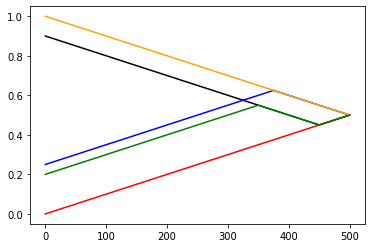

In [593]:
plt.plot(A1.history, color='black')
plt.plot(B1.history, color='red')
plt.plot(C1.history, color='blue')
plt.plot(D1.history, color='orange')
plt.plot(E1.history, color='green')
plt.show

In [594]:
C = Particle([1,1])
B = Particle([0.5,1])
A = Particle([1,0])
D = Particle([0,0])
A.attractor(B);
B.attractor(C);
C.attractor(D);
D.attractor(A);

In [595]:
sum([x.pos for x in [A,B,C,D]])

array([2.5, 2. ])

In [596]:
run([A,B,C,D], 0.001, pairwise_distance, distance_euclidean)

The convergence point is: [0.63059954 0.42667442]


<function matplotlib.pyplot.show(*args, **kw)>

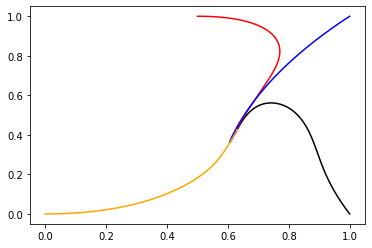

In [597]:
plt.plot(A.dim(0), A.dim(1), color='black')
plt.plot(B.dim(0), B.dim(1), color='red')
plt.plot(C.dim(0), C.dim(1), color='blue')
plt.plot(D.dim(0), D.dim(1), color='orange')
plt.show

In [598]:
X1 = Particle([1,1,1])
X2 = Particle([0,0,0])
X3 = Particle([0,1,1])
X4 = Particle([1,0,0])
X1.attractor(X2);
X2.attractor(X3);
X3.attractor(X4);
X4.attractor(X1);
run([X1, X2, X3, X4], 0.001, pairwise_distance)

The convergence point is: [0.49971575 0.52351851 0.52351851]


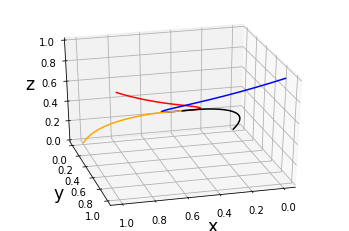

In [599]:
# Now we make a 3-d plot

#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

# Access the particle positions here
for p in [[X1, 'red'], [X2, 'black'], [X3, 'blue'], [X4, 'orange']]:
    ax.plot(p[0].dim(0), p[0].dim(1), p[0].dim(2), color=p[1])

ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(30,75)

In [600]:
def func(a,b, OP):
    return OP(a,b)

In [601]:
p1 = complex(0.99,0)
p2 = complex(0,0.99)
p3 = complex(0,-0.99)
p4 = complex(0.3,-0.95)
distance_poincare(p1, p2)

9.89351296947574

In [602]:
P1h = Particle(p1)
P2h = Particle(p2)
P3h = Particle(p3)
P4h = Particle(p4)
P1h.attractor(P2h);
P2h.attractor(P3h);
P3h.attractor(P4h);
P4h.attractor(P1h);
run([P1h, P2h, P3h, P4h], 0.01, pairwise_distance, distance_poincare)

The convergence point is: (0.2050244665360995-0.23286044778103518j)


In [603]:
P1e = Particle([p1.real, p1.imag])
P2e = Particle([p2.real, p2.imag])
P3e = Particle([p3.real, p3.imag])
P4e = Particle([p4.real, p4.imag])
P1e.attractor(P2e);
P2e.attractor(P3e);
P3e.attractor(P4e);
P4e.attractor(P1e);
run([P1e, P2e, P3e, P4e], 0.01, pairwise_distance)

The convergence point is: [ 0.33219823 -0.04916658]


In [604]:
print("hypberbolic: " + str(distance_hyperbolic(p1, p2)))
print("euclidean: " + str(distance_euclidean(p1, p2)))

hypberbolic: 9.893512969476173
euclidean: 1.4000714267493641


<function matplotlib.pyplot.show(*args, **kw)>

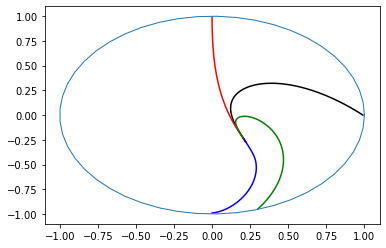

In [605]:
plt.plot([x.real for x in P1h.history], [y.imag for y in P1h.history], color='black')
plt.plot([x.real for x in P2h.history], [y.imag for y in P2h.history], color='red')
plt.plot([x.real for x in P3h.history], [y.imag for y in P3h.history], color='blue')
plt.plot([x.real for x in P4h.history], [y.imag for y in P4h.history], color='green')
t = np.linspace(0,np.pi*2,50)
plt.plot(np.cos(t), np.sin(t), linewidth=1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

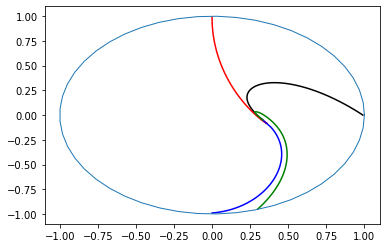

In [606]:
plt.plot(P1e.dim(0), P1e.dim(1), color='black')
plt.plot(P2e.dim(0), P2e.dim(1), color='red')
plt.plot(P3e.dim(0), P3e.dim(1), color='blue')
plt.plot(P4e.dim(0), P4e.dim(1), color='green')
t = np.linspace(0,np.pi*2,50)
plt.plot(np.cos(t), np.sin(t), linewidth=1)
plt.show

In [610]:
X1 = Particle(complex(0.999,0))
X2 = Particle(complex(0,0.999))
X1.attractor(X2);
X2.attractor(X1);
run([X1, X2], 0.01, pairwise_distance, distance_poincare)

The convergence point is: (0.4997687141117918+0.49923128588820853j)


In [611]:
distance_poincare(complex(0.999,0), complex(0,0.999))

14.507657988794083

In [190]:
# having problems with hyperbolic space